<a href="https://colab.research.google.com/github/Sowmini1997/ICC-data-analysis/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Credit Card Default Prediction - Raavi Sowmini/Data & Resources/default of credit card clients.xls")

Starting with undarstanding the dataset 



In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,...,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,...,0,0,0,1
2,2,120000,2,2,...,1000,0,2000,1
3,3,90000,2,2,...,1000,1000,5000,0
4,4,50000,2,2,...,1100,1069,1000,0


In [ ]:
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df.columns.name = None

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

There are no null values

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,...,30000,30000,30000,30000
unique,30000,81,2,7,...,6937,6897,6939,2
top,30000,50000,2,2,...,0,0,0,0
freq,1,3365,18112,14030,...,6408,6703,7173,23364


In [ ]:
pd.DataFrame(df.astype(int).describe())

,ID,LIMIT_BAL,SEX,EDUCATION,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,...,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,...,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,...,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,...,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,...,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,...,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,...,0,0,0,1
1,2,120000,2,2,...,1000,0,2000,1
2,3,90000,2,2,...,1000,1000,5000,0
3,4,50000,2,2,...,1100,1069,1000,0
4,5,50000,1,2,...,9000,689,679,0


We can observe the values of different columns are of different range , so scaling is required

In [ ]:
df.PAY_0.unique()

array([2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6], dtype=object)

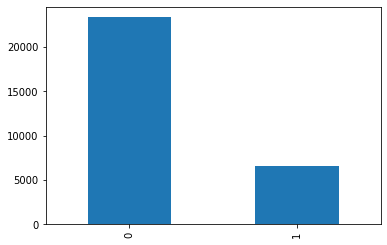

In [ ]:
df['default payment next month'].value_counts().plot(kind='bar');

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

28% of the instances did not default on their payments

taking 70% for training ans 30% for testing .Also tried taking 80% for training and 20% for testing but the former gave better accuracy .

In [ ]:
df_copy = df.drop(["ID"],1)  # dropping ID as its not an important feature
X = df_copy.iloc[:,:-1].values
y = df_copy.iloc[:,-1].values
y=y.astype('int')
 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

Scaling the variables 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

Implementing different models to check which is best

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

In [ ]:
classifiers=[]
model1 = xgboost.XGBClassifier(Probability=True)
classifiers.append(model1)
model2 = svm.SVC(probability=True)
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [ ]:
models_list=["XGB Classifier",'SVC','DecisionTreeClassifier','RandomForestClassifier']

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
results=[]
for clf in classifiers:
    clf.fit(X_train_norm, y_train)
    y_pred= clf.predict(X_test_norm)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))
    roc=roc_auc_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([clf, acc,prec,rec, f1,roc])
   

Accuracy of XGBClassifier(Probability=True, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.8197333333333333
Confusion Matrix of XGBClassifier(Probability=True, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=No

In [ ]:
performance_df=pd.DataFrame(results)
performance_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']

In [ ]:
performance_df['Model']=models_list

In [ ]:
performance_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGB Classifier,0.819733,0.681609,0.355516,0.467297,0.654010
1,SVC,0.815333,0.685940,0.312950,0.429807,0.635984
2,DecisionTreeClassifier,0.722267,0.382303,0.404077,0.392888,0.608674
3,RandomForestClassifier,0.811200,0.636957,0.351319,0.452859,0.647024


XGB,SVC AND Random forest classifiers are performing almost equally well

Hence Removing DecisionTreeClassifier

In [ ]:
classifiers.remove(model3)

In [ ]:
models_list.pop(2)

'DecisionTreeClassifier'

KS-Static metric function

In [ ]:
pip install colorama

In [ ]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [ ]:
def kstable(prob,test):
  data_ks=pd.DataFrame(prob)
  data_ks['dep']=y_test
  data_ks.columns=['one','prob','dep']
  del data_ks['one']
  return ks(data=data_ks,target="dep", prob="prob")

KS-Static metric for diff models

In [ ]:
i=0

In [ ]:
for clf in classifiers:
  prob=clf.predict_proba(X_test_norm)
  print("\n")
  print("KS tabel of ",models_list[i])
  i=i+1
  kstable(prob,y_test)



KS tabel of  XGB Classifier
        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.576222  0.863270     529        221     31.71%         3.79%   
2       0.304696  0.575971     313        437     18.76%         7.49%   
3       0.218975  0.304683     216        534     12.95%         9.16%   
4       0.173599  0.218791     149        601      8.93%        10.31%   
5       0.146599  0.173520     126        624      7.55%        10.70%   
6       0.124751  0.146566      95        655      5.70%        11.23%   
7       0.106013  0.124744      76        674      4.56%        11.56%   
8       0.089557  0.105976      75        675      4.50%        11.57%   
9       0.069801  0.089554      53        697      3.18%        11.95%   
10      0.022823  0.069717      36        714      2.16%        12.24%   

       cum_eventrate cum_noneventrate    KS  
Decile                             

KS score of Model 1 i.e of XG boost classifier is 43% and is higher

If KS is in top 3 decile and score above 40, it is considered a good predictive model. Hence XGboost is a good predictive model

Implementing XGB classifier by tuning hyperparameters

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:

classifier=xgboost.XGBClassifier()

In [ ]:

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_norm,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.8s finished



 Time taken: 0 hours 1 minutes and 0.26 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.25,
 'max_depth': 3,
 'min_child_weight': 7}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train_norm,y_train,cv=10)

In [ ]:
score

array([0.81777778, 0.82133333, 0.81511111, 0.81688889, 0.82044444,
       0.82177778, 0.81066667, 0.82355556, 0.82711111, 0.83244444])

In [ ]:
score.mean()

0.8207111111111111

In [ ]:
classifier.fit(X_train_norm, y_train)
y_pred_xgb= classifier.predict(X_test_norm)

cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
acc

[[5546  286]
 [1082  586]]


0.8176

In [ ]:
prob_xgb=classifier.predict_proba(X_test_norm)

kstable(prob_xgb,y_test)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.573350  0.917407     522        228     31.29%         3.91%   
2       0.309973  0.573074     327        423     19.60%         7.25%   
3       0.220412  0.309917     210        540     12.59%         9.26%   
4       0.174397  0.220349     136        614      8.15%        10.53%   
5       0.146473  0.174354     126        624      7.55%        10.70%   
6       0.124539  0.146424     100        650      6.00%        11.15%   
7       0.102797  0.124499      85        665      5.10%        11.40%   
8       0.082626  0.102777      62        688      3.72%        11.80%   
9       0.059808  0.082597      59        691      3.54%        11.85%   
10      0.008146  0.059686      41        709      2.46%        12.16%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             31.29

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.573350,0.917407,522,228,31.29%,3.91%,31.29%,3.91%,27.4
2,0.309973,0.573074,327,423,19.60%,7.25%,50.90%,11.16%,39.7
3,0.220412,0.309917,210,540,12.59%,9.26%,63.49%,20.42%,43.1
4,0.174397,0.220349,136,614,8.15%,10.53%,71.64%,30.95%,40.7
5,0.146473,0.174354,126,624,7.55%,10.70%,79.20%,41.65%,37.5
6,0.124539,0.146424,100,650,6.00%,11.15%,85.19%,52.79%,32.4
7,0.102797,0.124499,85,665,5.10%,11.40%,90.29%,64.20%,26.1
8,0.082626,0.102777,62,688,3.72%,11.80%,94.00%,75.99%,18.0
9,0.059808,0.082597,59,691,3.54%,11.85%,97.54%,87.84%,9.7


KS static score is just increased by .1% after tuning the parameters